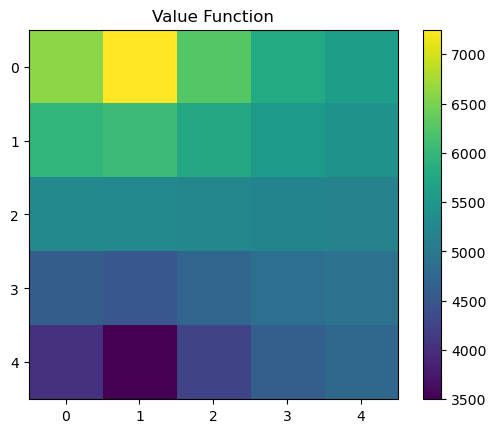

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Grid size
rows, cols = 5, 5

# Transition probabilities
prob_action = 0.25

# Rewards
reward_A = 10
reward_B = 5
reward_outside = -1

# Discount factor
gamma = 1.0

# Initialize value function
V = np.zeros((rows, cols))

# Define valid actions
actions = [(0, 1), (1, 0), (0, -1), (-1, 0)]

# Iterate until convergence
max_iterations = 1000
for iteration in range(max_iterations):
    # Copy current value function
    V_new = np.copy(V)
    
    # Update value function for each state
    for i in range(rows):
        for j in range(cols):
            state_value = 0
            for action in actions:
                next_i, next_j = i + action[0], j + action[1]
                
                # Check if the next state is outside the grid
                if next_i < 0 or next_i >= rows or next_j < 0 or next_j >= cols:
                    state_value += prob_action * (reward_outside + gamma * V[i, j])
                else:
                    # Check if the next state is A or B
                    if (i, j) == (0, 1):
                        state_value += prob_action * (reward_A + gamma * V[0, 1])
                    elif (i, j) == (4, 1):
                        state_value += prob_action * (reward_B + gamma * V[4, 1])
                    else:
                        state_value += prob_action * (0 + gamma * V[next_i, next_j])
            
            V_new[i, j] = state_value
    
    # Check for convergence
    if np.sum(np.abs(V_new - V)) < 1e-6:
        break
    
    V = V_new

# Display the value function as a heatmap
plt.imshow(V, cmap='viridis', origin='upper')
plt.colorbar()
plt.title('Value Function')
plt.show()
